In [152]:
#Deterministic Environment
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import random
import time
class GridWorldEnv_D(gym.Env):

    def __init__(self, render_mode=None, size=5):
        self.size = size  
        self.state = np.zeros((5,5))
        self.max_timesteps = 100
        self.timestep = 0
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.count=0
    def location(self):
        return {"agent": self._agent_location, "target": self._target_location}
    def reset(self):
        self.count=0
        self.state = np.zeros((5,5))
        self._agent_location=[3,0]
        self._target_location=[4,4]
        self.state[tuple(self._agent_location)] = 1
        self.state[tuple(self._target_location)] = 0.5
        observation = self.state.flatten()
        info = {}

        return observation, info
    def step(self, action):   #step
        direction=""
        if action == 0: #down
            self._agent_location[0] += 1
            direction="Down"
        if action == 1: #up
            self._agent_location[0] -= 1
            direction="Up"
        if action == 2: #right
            self._agent_location[1] += 1
            direction="Right"
        if action == 3: #left
            self._agent_location[1] -= 1
            direction="Left"
        self._agent_location = np.clip(self._agent_location, 0, 4)

        self.timestep += 1
        terminated = np.array_equal(self._agent_location, self._target_location) or self.timestep==self.max_timesteps

        if np.array_equal(self._agent_location, [2,2]):
            reward = -5 
        elif np.array_equal(self._agent_location, [4,0]) or np.array_equal(self._agent_location, [0,4]):
            reward = -1
        elif np.array_equal(self._agent_location, self._target_location):
            reward = 10 
        else:
            reward = 1
        
        info = self.location()
        self.state = np.zeros((5,5))
        self.state[tuple(self._agent_location)] = 1
        self.state[tuple(self._target_location)] = 0.5
        observation = self.state.flatten()

        return direction, reward, terminated, info
    def render(self):
      plt.title('Grid Environment')
      # Define the images for each cell
      red=plt.imread(f'red.png')
      black=plt.imread(f'black.png')
      # Create a new figure and axis
      fig, ax = plt.subplots()
      # Create the grid visualization
      al=self._agent_location
      tl=self._target_location  
      ax.imshow(red, extent=(al[1]-0, al[1]+0.7, al[0]-0, al[0]+0.7), aspect='auto', zorder=1)
      if np.array_equal(al,tl):
          ax.imshow(red, extent=(tl[1]-0, tl[1]+0.7, tl[0]-0, tl[0]+0.7), aspect='auto', zorder=1)
      else:
          ax.imshow(black, extent=(tl[1]-0, tl[1]+0.7, tl[0]-0, tl[0]+0.7), aspect='auto', zorder=1)
      # Customize the ticks and labels
      ax.set_xticks(np.arange(5))
      ax.set_yticks(np.arange(5))
      ax.set_xticklabels(['1', '2', '3', '4','5'])
      ax.set_yticklabels(['1', '2', '3', '4','5'])
      plt.savefig(f"plot_{self.count}.png")
      self.count+=1
      # Show the grid visualization
      # plt.show()
      # plt.pause(0.2)
class RandomAgent_D:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

Initial Agent position
Current State [4 0]     Action: 0    Reward: -1 ,    Done: False
Current State [3 0]     Action: 1    Reward: 1 ,    Done: False
Current State [4 0]     Action: 0    Reward: -1 ,    Done: False
Current State [3 0]     Action: 1    Reward: 1 ,    Done: False
Current State [2 0]     Action: 1    Reward: 1 ,    Done: False
Current State [3 0]     Action: 0    Reward: 1 ,    Done: False
Current State [4 0]     Action: 0    Reward: -1 ,    Done: False
Current State [4 0]     Action: 3    Reward: -1 ,    Done: False
Current State [3 0]     Action: 1    Reward: 1 ,    Done: False
Current State [2 0]     Action: 1    Reward: 1 ,    Done: True
Final reward 2


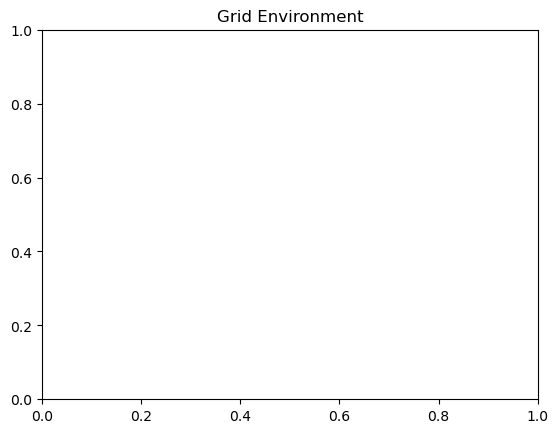

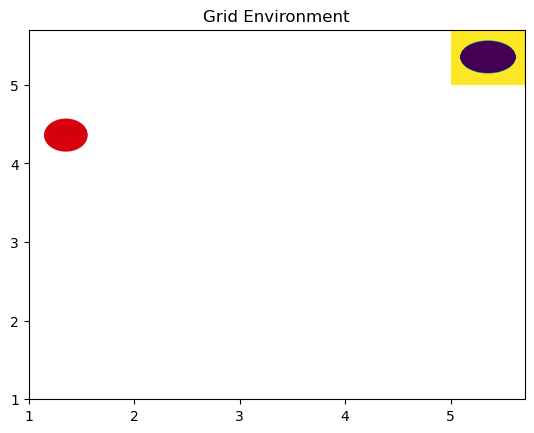

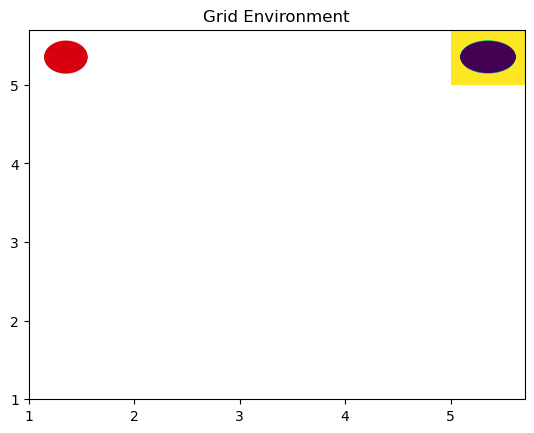

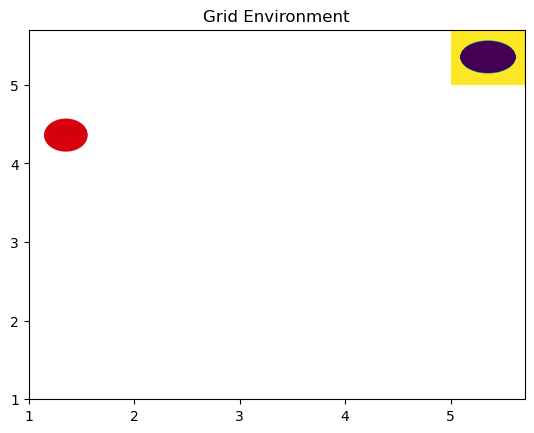

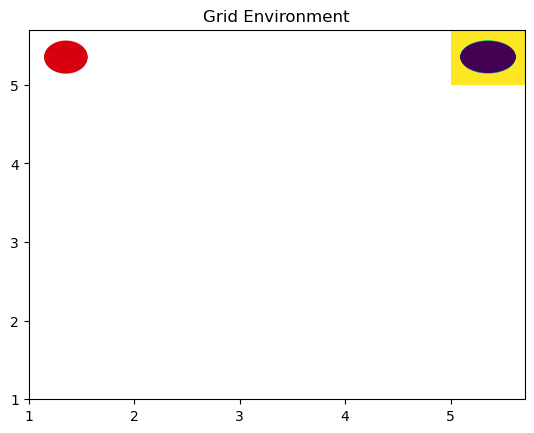

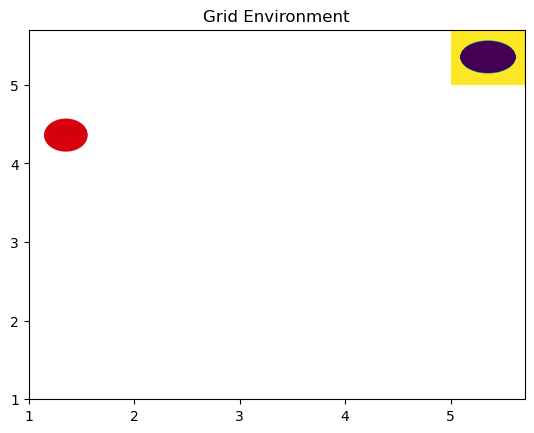

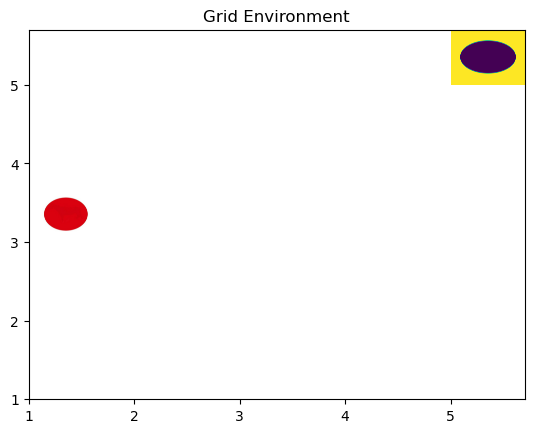

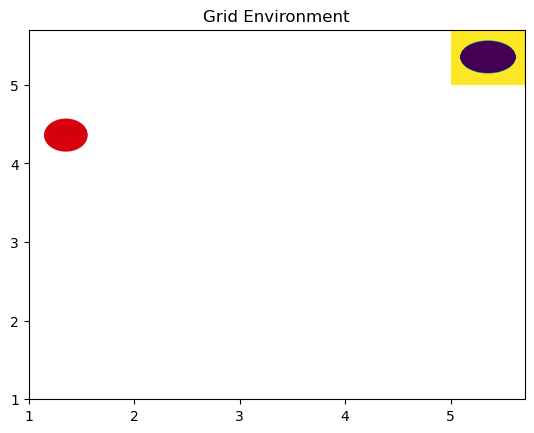

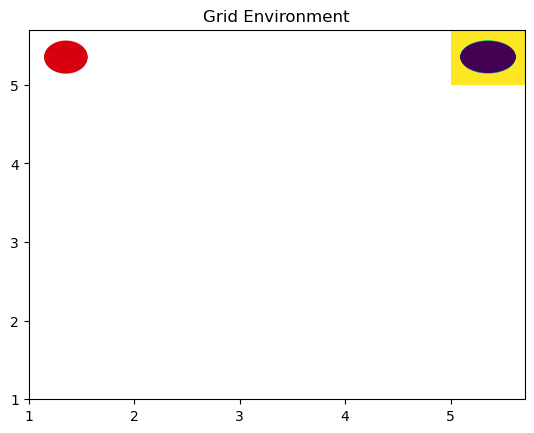

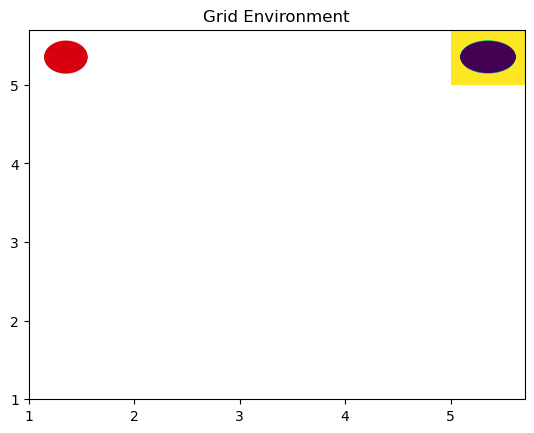

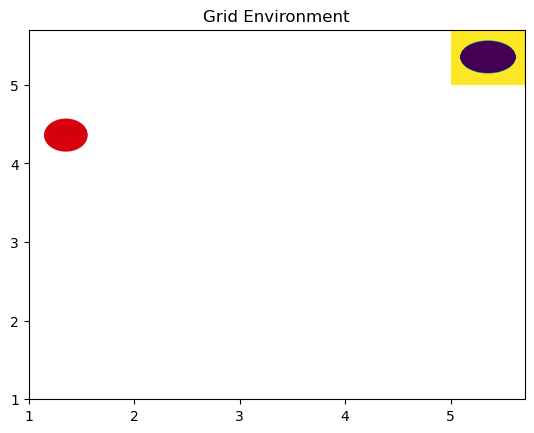

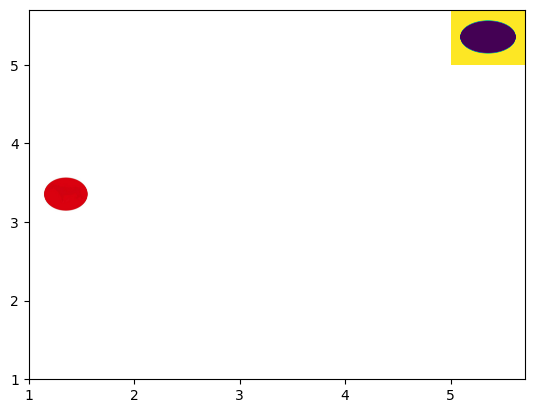

In [59]:
# Main Function for Deterministic Environment
if __name__ == '__main__':
  env = GridWorldEnv_D()
  agent = RandomAgent_D(env)

  obs, info = env.reset()
  terminated = False
  final_reward=0
  print("Initial Agent position")
  env.render()
  while not terminated:
    action = agent.step(obs)
    dir, reward, terminated,  info = env.step(action)
    ti=env.location()
    print('Current State',ti['agent'], '    Action:',action , '   Reward:', reward, ',    Done:', terminated)
    final_reward+=reward
    env.render()

  print("Final reward", final_reward)    

In [153]:
#Stochastic Environment
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import random
class GridWorldEnv_S(gym.Env):
    def __init__(self, render_mode=None, size=5):
        self.size = size  
        self.state = np.zeros((5,5))
        self.max_timesteps = 100
        self.timestep = 0
        self.count=0
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
    def location(self):
        return {"agent": self._agent_location, "target": self._target_location}
    def reset(self):
        self.count=0
        self.state = np.zeros((5,5))
        self._agent_location=[3,0]
        self._target_location=[4,4]
        self.state[tuple(self._agent_location)] = 1
        self.state[tuple(self._target_location)] = 0.5
        observation = self.state.flatten()
        info = {}
        return observation, info

    def step(self, action):   #step
        direction=""
        if np.random.uniform(0,1)>0.90:
            action=np.random.choice(self.action_space.n)
            
        if action == 0: #down
            self._agent_location[0] += 1
            direction="Down"
        if action == 1: #up
            self._agent_location[0] -= 1
            direction="Up"
        if action == 2: #right
            self._agent_location[1] += 1
            direction="Right"
        if action == 3: #left
            self._agent_location[1] -= 1
            direction="Left"
        self._agent_location = np.clip(self._agent_location, 0, 4)

        self.timestep += 1
        terminated = np.array_equal(self._agent_location, self._target_location) or self.timestep==self.max_timesteps

        if np.array_equal(self._agent_location, [2,2]):
            reward = -5 
        elif np.array_equal(self._agent_location, [4,0]) or np.array_equal(self._agent_location, [0,4]):
            reward = -1
        elif np.array_equal(self._agent_location, self._target_location):
            reward = 10 
        else:
            reward = 1
        
        info = self.location()
        self.state = np.zeros((5,5))
        self.state[tuple(self._agent_location)] = 1
        self.state[tuple(self._target_location)] = 0.5
        observation = self.state.flatten()

        return action, reward, terminated, info
    def render(self):
      plt.title('Grid Environment')
      # Define the images for each cell
      red=plt.imread(f'red.png')
      black=plt.imread(f'black.png')
      # Create a new figure and axis
      fig, ax = plt.subplots()
      # Create the grid visualization
      al=self._agent_location
      tl=self._target_location  
      ax.imshow(red, extent=(al[1]-0, al[1]+0.7, al[0]-0, al[0]+0.7), aspect='auto', zorder=1)
      if np.array_equal(al,tl):
          ax.imshow(red, extent=(tl[1]-0, tl[1]+0.7, tl[0]-0, tl[0]+0.7), aspect='auto', zorder=1)
      else:
          ax.imshow(black, extent=(tl[1]-0, tl[1]+0.7, tl[0]-0, tl[0]+0.7), aspect='auto', zorder=1)
      # Customize the ticks and labels
      ax.set_xticks(np.arange(5))
      ax.set_yticks(np.arange(5))
      ax.set_xticklabels(['1', '2', '3', '4','5'])
      ax.set_yticklabels(['1', '2', '3', '4','5'])
      plt.savefig(f"plot_{self.count}.png")
      self.count+=1
      # Show the grid visualization
      # plt.show()
      # plt.pause(0.2)

class RandomAgent_S:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)


Initial Agent position
Current State [4 0]    Completed_action: 0     OG action: 0 ,       Done: False ,    Reward: -1
Current State [4 1]    Completed_action: 2     OG action: 2 ,       Done: False ,    Reward: 1
Current State [4 2]    Completed_action: 2     OG action: 2 ,       Done: False ,    Reward: 1
Current State [4 1]    Completed_action: 3     OG action: 3 ,       Done: False ,    Reward: 1
Current State [4 2]    Completed_action: 2     OG action: 2 ,       Done: False ,    Reward: 1
Current State [4 1]    Completed_action: 3     OG action: 3 ,       Done: False ,    Reward: 1
Current State [4 0]    Completed_action: 3     OG action: 3 ,       Done: False ,    Reward: -1
Current State [4 0]    Completed_action: 0     OG action: 2 ,       Done: False ,    Reward: -1
Current State [4 0]    Completed_action: 3     OG action: 3 ,       Done: False ,    Reward: -1
Current State [4 1]    Completed_action: 2     OG action: 2 ,       Done: True ,    Reward: 1
Final reward 2


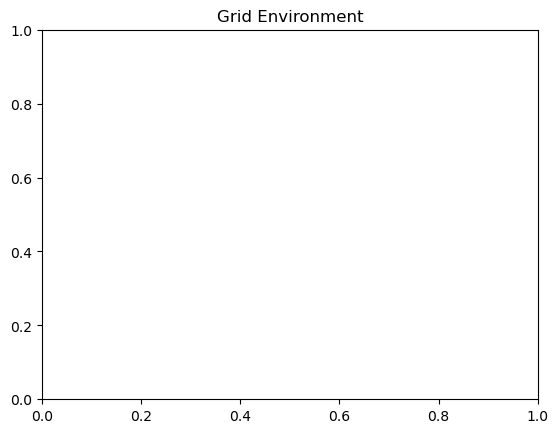

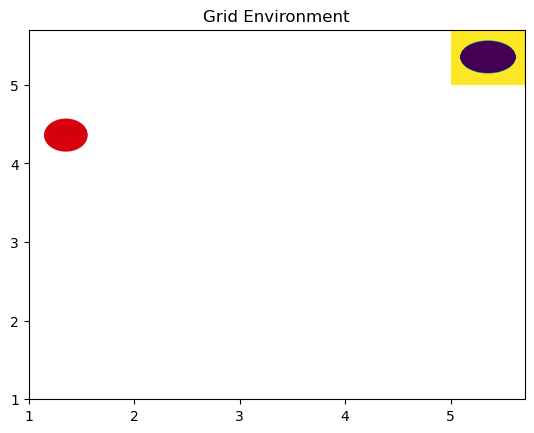

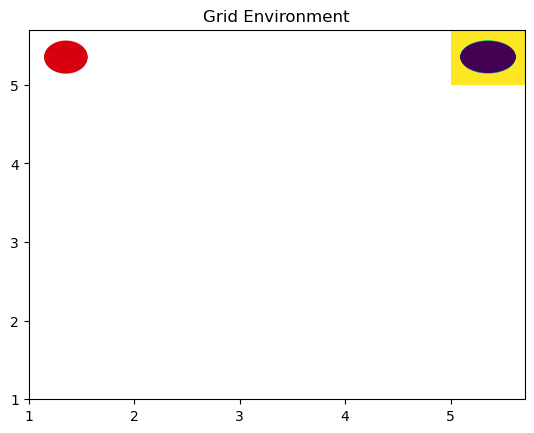

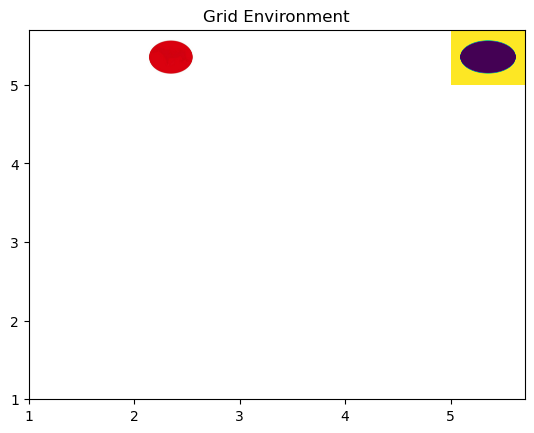

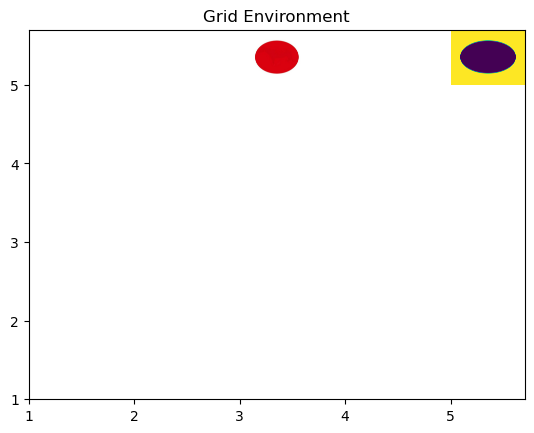

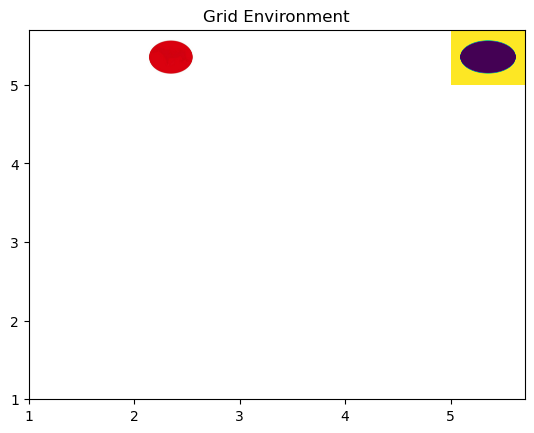

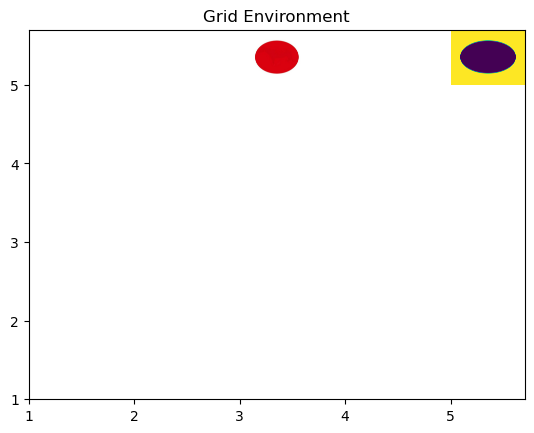

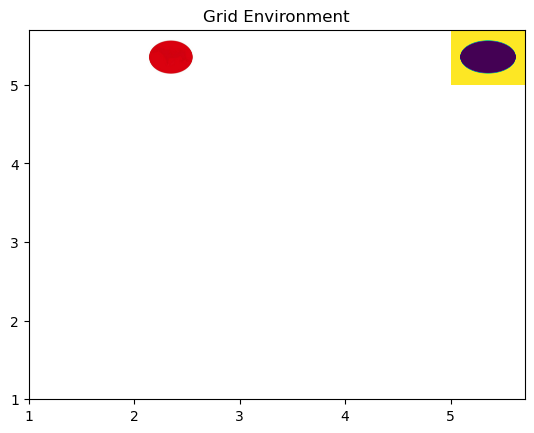

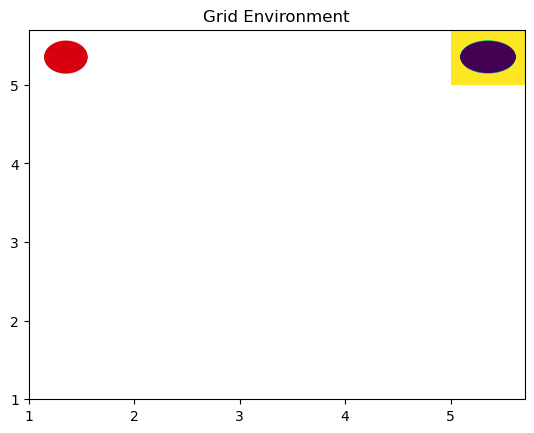

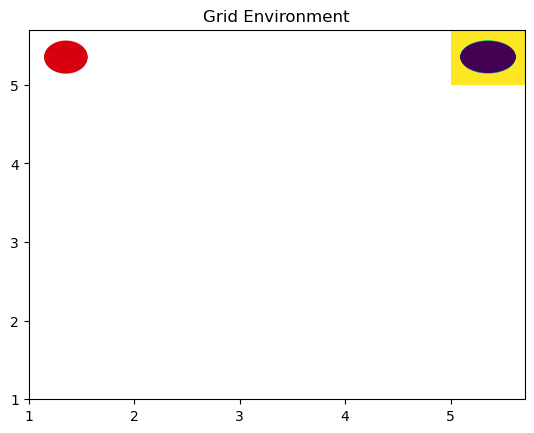

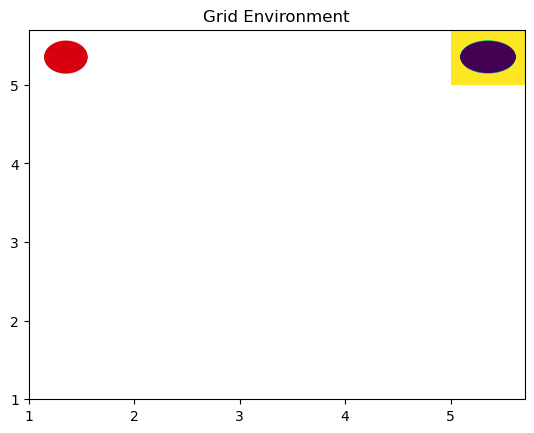

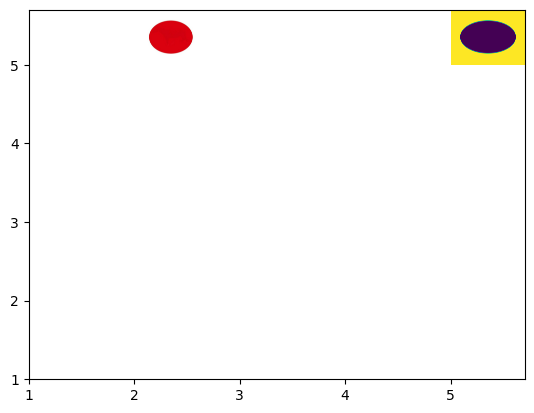

In [61]:
#Main function for Stochastic Environment
if __name__ == '__main__':
  env = GridWorldEnv_S()
  agent = RandomAgent_S(env)

  obs, info = env.reset()
  terminated = False
  final_reward=0
  print("Initial Agent position")
  env.render()
  while not terminated:
    action = agent.step(obs)
    dir, reward, terminated,  info = env.step(action)
    ti=env.location()
   
    print('Current State',ti['agent'],'   Completed_action:', dir, '    OG action:',action, ',       Done:', terminated, ',    Reward:', reward)
    final_reward+=reward
    env.render()

  print("Final reward", final_reward) 

In [119]:
#Q-Learning 
class Q_learning:
    def __init__(self,episodes,epsilon,gamma,alpha,decay_factor, env):
        self.episodes=episodes
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        self.decay_factor=decay_factor
        self.env = env
        self.observation_space = env.observation_space.n
        self.action_space = env.action_space.n
        self.Q_table=np.zeros((self.observation_space,self.action_space))
        self.episodes_reward=[]
        
    def learning(self):
        for i in range(self.episodes):
           obs, info = self.env.reset()
           terminated = False
           size=self.action_space
           t=self.env.location()
           state=t['agent'][0]*size + t['agent'][1]
           ep_reward=0
           for j in range(100): 
               if np.random.uniform(0,1)<self.epsilon:
                   action=self.env.action_space.sample()
    
               else:
                   temp=self.Q_table[state, :]
                   action=np.argmax(temp)
         
               dir, reward, terminated,  info = self.env.step(action)
               ti=self.env.location()
               next_state=ti['agent'][0]*size + ti['agent'][1]
               c_state = self.Q_table[state,action]
               self.Q_table[state,action]= c_state + self.alpha*(reward + (self.gamma*np.max(self.Q_table[next_state,:])) - c_state)
               ep_reward+=reward
               if terminated==True:
                   break
               state=next_state
           # print(i)    
           self.episodes_reward.append(ep_reward)
           self.epsilon=1*np.exp(-self.decay_factor*i) 

In [154]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    learn= Q_learning(1000,1,0.9,0.1,0.007,env)
    print(learn.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [155]:
#Main function for Q learning Deterministic
if __name__ == '__main__':
    env_D = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    learn_D= Q_learning(1000,1,0.9,0.1,0.007,env_D)
    learn_D.learning()
    

In [156]:
print(learn_D.Q_table)

[[ 9.99253333  6.01285577  7.79526604  8.3919023 ]
 [ 9.90223429  5.27266924  4.18747991  4.76565416]
 [ 7.60595473  1.84009618  3.21088858  3.29956252]
 [ 7.68310849  3.62002781  3.17920775  2.67706417]
 [10.          9.92427808  9.99720189  9.96024731]
 [ 9.99999967  9.39120027  8.96165624  9.77874941]
 [ 1.24070818  4.99453978  7.43295315  9.84250399]
 [ 7.88980321  5.10453614  9.84770617  6.42150428]
 [10.         10.         10.         10.        ]
 [ 9.9997627   9.9993131   3.9974876  10.        ]
 [ 9.12174459  8.10785577  8.8747579   9.9996757 ]
 [ 6.34350286  6.21064688  9.96807187  2.5508573 ]
 [ 8.         10.         10.         10.        ]
 [ 9.99742789  9.99944397  9.9968717  10.        ]
 [ 7.54520381  2.68834459  7.66330478  9.99934447]
 [ 4.00545321  6.98889037  9.42338729  4.27104109]
 [ 8.00806292 10.          9.9959895   8.06545681]
 [ 9.58169912  9.99999042  7.99715155  7.47809688]
 [ 5.52960161  4.66846119  9.29181881  6.42555796]
 [ 3.18163758  4.33596289  9.77

In [111]:
import pickle
with open('D_Qlearning', 'wb') as f:
    pickle.dump(learn_D.Q_table, f)


In [95]:
with open('S_Qlearning', 'wb') as f:
    pickle.dump(learn_S.Q_table, f)

In [420]:
import os
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /Users/eshwanth/Documents/Grad/Spring 24/RL


In [138]:
def greedy_learning(Q,env,alpha,gamma):
    episodes_reward=[]
    for i in range(10):
       obs, info = env.reset()
       terminated = False
       size=env.action_space.n
       t=env.location()
       state=t['agent'][0]*size + t['agent'][1]
       ep_reward=0
       for j in range(25): 
           temp=Q[state, :]
           action=np.argmax(temp)
           dir, reward, terminated,  info = env.step(action)
           ti=env.location()
           next_state=ti['agent'][0]*size + ti['agent'][1]
           c_state = Q[state,action]
           Q[state,action]= c_state + alpha*(reward + (gamma*np.max(Q[next_state,:])) - c_state)
           ep_reward+=reward
           if terminated==True:
               break
           state=next_state
       # print(i)    
       episodes_reward.append(ep_reward)
    return episodes_reward

In [157]:
#Greedy Qlearning Deterministic
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    D_greedy=greedy_learning(learn_D.Q_table,env_DG,0.1,0.9)

In [158]:
print(D_greedy)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


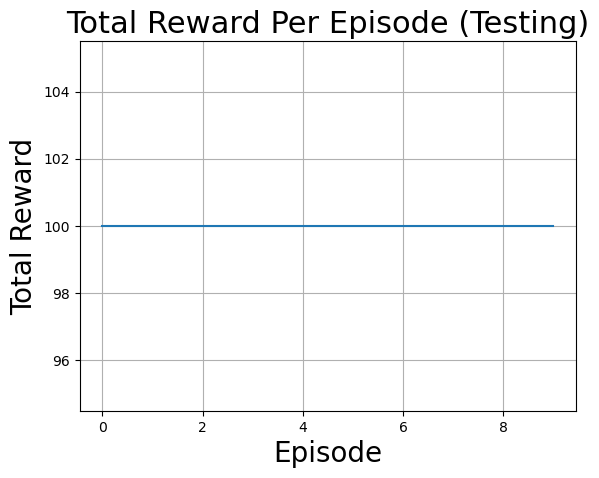

In [172]:
#Total Reward Per Episode Greedy Qlearning Deterministic
plt.figure()
plt.plot(D_greedy)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Testing)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [160]:
#Main function for Q learning Stochastic 
if __name__ == '__main__':
    env_S = GridWorldEnv_S()
    # agent = RandomAgent_D(env)
    learn_S= Q_learning(1000,1,0.9,0.1,0.007,env_S)
    

In [161]:
print(learn_S.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [166]:
#Main function for Q learning Stochastic 
if __name__ == '__main__':
    env_S = GridWorldEnv_S()
    # agent = RandomAgent_D(env)
    learn_S= Q_learning(1000,1,0.9,0.1,0.007,env_S)
    
    learn_S.learning()

In [167]:
print(learn_S.Q_table)

[[9.97549224 9.97620519 9.97671599 9.97697639]
 [8.07441161 8.16589441 6.8600669  9.95611984]
 [5.14694976 3.30417987 3.47943381 9.58435912]
 [3.32310243 1.83204773 5.86417755 1.93250968]
 [9.95094652 9.79134019 9.60136795 9.58950413]
 [9.79640721 9.62652435 9.06237417 9.92020887]
 [1.17591588 6.11270593 4.20048032 9.68411462]
 [4.93992798 2.65226623 4.2737532  7.13651765]
 [9.84339892 9.77192335 9.84251664 9.92096821]
 [9.699165   9.2127349  4.49257445 9.13190216]
 [7.4486627  6.87705124 6.73709598 9.63103333]
 [4.50089219 2.84204167 9.54362327 1.10990872]
 [7.97770627 9.85236008 9.39550243 9.51087599]
 [9.90846761 9.82816716 9.83440762 9.82803281]
 [8.93423274 3.08917841 8.4415438  9.67328829]
 [9.9730627  5.24244555 5.8344442  5.8816984 ]
 [7.97118206 9.75394078 9.67751745 7.82534934]
 [9.5632826  9.47574124 9.95848219 8.04638212]
 [9.24672091 9.59862889 9.97540493 9.58098292]
 [9.71685196 9.18978034 9.99945973 9.21787635]
 [0.         0.         0.         0.        ]
 [0.         

In [174]:
#Greedy Qlearning Stochastic
if __name__ == '__main__':
    env_SG = GridWorldEnv_S()
    S_greedy=greedy_learning(learn_S.Q_table,env_SG,0.1,0.9)
    print(S_greedy)

[100, 28, 33, 100, 33, 100, 27, 20, 55, 11]


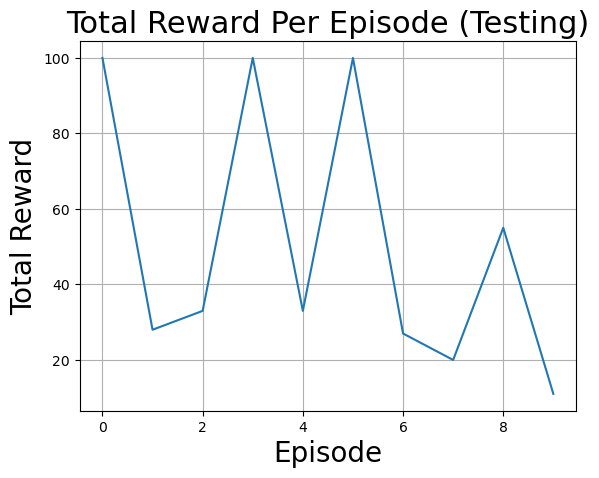

In [175]:
#Total Reward Per Episode Greedy Qlearning Stochastic
plt.figure()
plt.plot(S_greedy)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Testing)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

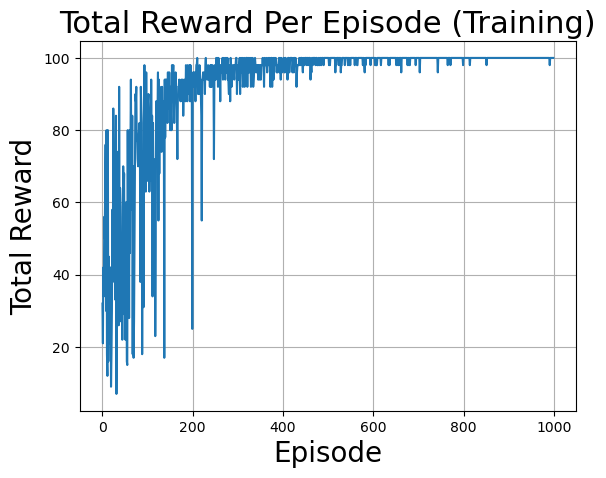

In [171]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(learn_D.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

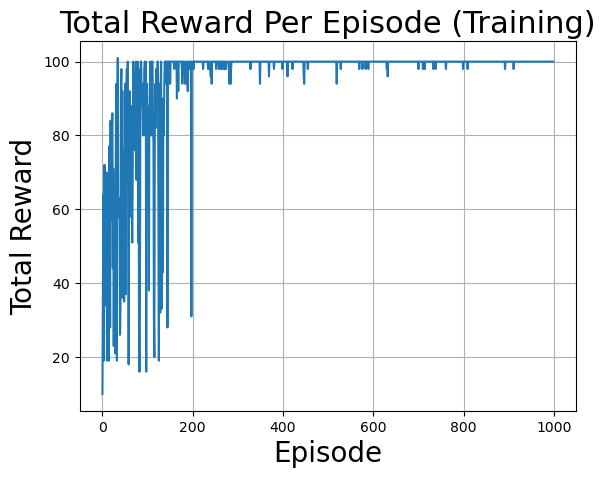

In [135]:
#Total Reward Per Episode Q learning Stochastic
plt.figure()
plt.plot(learn_S.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

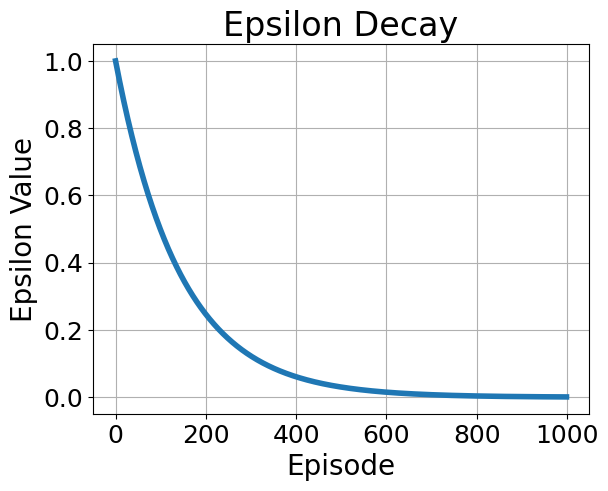

In [92]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.007 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [176]:
#SARSA-Learning 
class SARSA:
    def __init__(self,episodes,epsilon,gamma,alpha,decay_factor, env):
        self.episodes=episodes
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha
        self.decay_factor=decay_factor
        self.env = env
        self.observation_space = env.observation_space.n
        self.action_space = env.action_space.n
        self.Q_table=np.zeros((self.observation_space,self.action_space))
        self.episodes_reward=[]
        
    def learning(self):
        for i in range(self.episodes):
           obs, info = self.env.reset()
           terminated = False
           size=self.action_space
           t=self.env.location()
           state=t['agent'][0]*size + t['agent'][1]
           ep_reward=0
           for j in range(100): 
               if np.random.uniform(0,1)<self.epsilon:
                   action=self.env.action_space.sample()
    
               else:
                   temp=self.Q_table[state, :]
                   action=np.argmax(temp)
         
               dir, reward, terminated,  info = self.env.step(action)
               ti=self.env.location()
               next_state=ti['agent'][0]*size + ti['agent'][1]
               c_state = self.Q_table[state,action]
               self.Q_table[state,action]= c_state + self.alpha*(reward + (self.gamma*self.Q_table[next_state,np.random.choice([0,1,2,3])]) - c_state)
               ep_reward+=reward
               if terminated==True:
                   break
               state=next_state
           # print(i)    
           self.episodes_reward.append(ep_reward)
           self.epsilon=1*np.exp(-self.decay_factor*i) 

In [213]:
#SARSA Deterministic
if __name__ == '__main__':
    env_SD = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    learn_D_S= SARSA(1000,1,0.9,0.1,0.007,env_SD)
    learn_D_S.learning()
    print(learn_D_S.Q_table)
    

[[ 5.56448953  6.1048107   5.70405383  6.31008255]
 [ 4.44567528  5.66159956  4.55265233  6.29203633]
 [ 2.32718955  3.86073316  3.34163642  6.03868645]
 [ 2.33989839  1.94430848  2.51248502  4.13373522]
 [ 4.35581171  6.29786707  4.50902453  5.78690338]
 [ 2.79019583  5.43807541  2.04808935  5.6391441 ]
 [-4.08281992  3.09539748  2.72687833  4.35411684]
 [ 2.32822933  2.27504434  4.65722677  1.43732176]
 [ 3.78186704  5.70148895  1.9910222   4.69487978]
 [ 3.23220661  4.41910248 -4.06937881  4.66967287]
 [ 0.93791743  1.11567723  2.29569471  0.36693518]
 [ 3.09272896  2.50544427  3.89496717 -3.7344587 ]
 [ 0.9198681   5.01759831  3.05615612  2.91282671]
 [ 2.89593216  1.4605613   1.83460699  3.75396395]
 [ 1.67635717 -3.94955409  1.79030864  3.39135493]
 [ 4.58041283  1.17692267  1.67851091  0.57342625]
 [ 1.37413918  3.53585534  3.06156058  0.84442436]
 [ 2.38432581  3.18665866  2.23833283  0.35964101]
 [ 1.44521462  1.08529493  2.96729759  1.9080944 ]
 [ 1.4302234   2.01430658  9.74

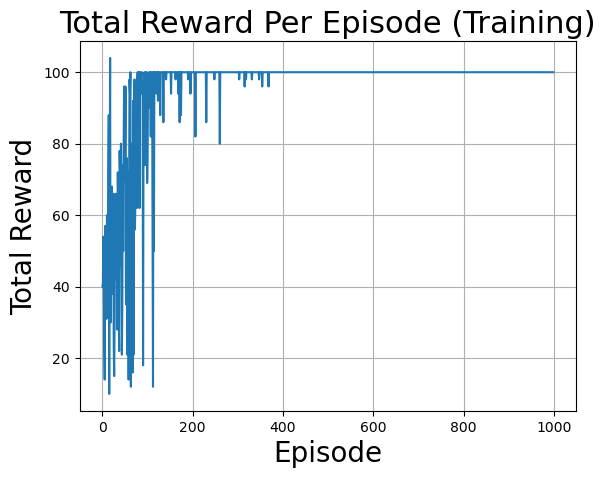

In [214]:
#Total Reward Per Episode SARSA Deterministic
plt.figure()
plt.plot(learn_D_S.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [224]:
#SARSA Stochastic
if __name__ == '__main__':
    env_SS = GridWorldEnv_S()
    # agent = RandomAgent_D(env)
    learn_S_S= SARSA(1000,1,0.9,0.1,0.007,env_SS)
    learn_S_S.learning()
    print(learn_S_S.Q_table)

[[ 5.56060398  6.1519316   5.18926423  5.73011302]
 [ 4.20242972  5.43378332  4.10989457  5.97880664]
 [ 1.76280789  2.82475221  2.75069058  5.23409962]
 [ 3.51431117  2.21114941  2.29844308  2.61271205]
 [ 4.42457309  6.12463211  4.4060204   4.7760528 ]
 [ 3.02828866  5.26924774  2.50280932  4.38657571]
 [-2.46496559  2.07100088  2.51177029  3.37243063]
 [ 2.15455679  2.73979547  3.92578218  2.37435032]
 [ 3.53328328  5.22580258  3.34929451  3.6845237 ]
 [ 2.59880772  4.46648222 -3.85060982  3.3340671 ]
 [ 1.40154606  0.83348728  2.26210237  0.84268656]
 [ 1.37888001  2.84120432  2.12478197 -2.56049436]
 [ 1.65117093  3.98811512  3.44776558  3.51220927]
 [ 2.94214563  2.22252484  1.78017905  3.78690626]
 [ 1.525727   -3.49370496  2.58704223  3.05848311]
 [ 2.15173034  1.48074632  3.62852198 -0.4451964 ]
 [ 3.22667858  3.95868851  2.68484052  1.62505573]
 [ 2.24869484  3.24204849  1.98587783  0.96699723]
 [ 1.62956154  0.77886644  3.03787461  1.63949032]
 [ 3.3932146   1.98284733  9.40

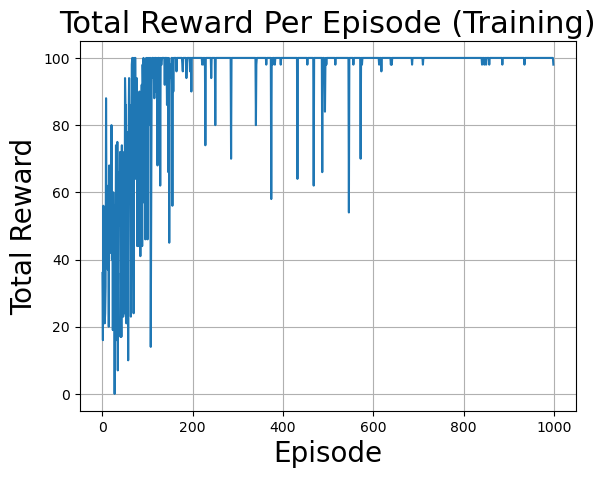

In [225]:
#Total Reward Per Episode SARSA Stochastic
plt.figure()
plt.plot(learn_S_S.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [217]:
def greedy_learning_S(Q,env,alpha,gamma):
    episodes_reward=[]
    for i in range(10):
       obs, info = env.reset()
       terminated = False
       size=env.action_space.n
       t=env.location()
       state=t['agent'][0]*size + t['agent'][1]
       ep_reward=0
       for j in range(100): 
           temp=Q[state, :]
           action=np.argmax(temp)
           dir, reward, terminated,  info = env.step(action)
           ti=env.location()
           next_state=ti['agent'][0]*size + ti['agent'][1]
           c_state = Q[state,action]
           Q[state,action]= c_state + alpha*(reward + (gamma*np.max(Q[next_state,np.random.choice([0,1,2,3])])) - c_state)
           ep_reward+=reward
           if terminated==True:
               break
           state=next_state
       # print(i)    
       episodes_reward.append(ep_reward)
    return episodes_reward

In [218]:
#Greedy Qlearning Deterministic
if __name__ == '__main__':
    env_DGS = GridWorldEnv_D()
    D_S_greedy=greedy_learning_S(learn_D_S.Q_table,env_DGS,0.1,0.9)
    print(D_S_greedy)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


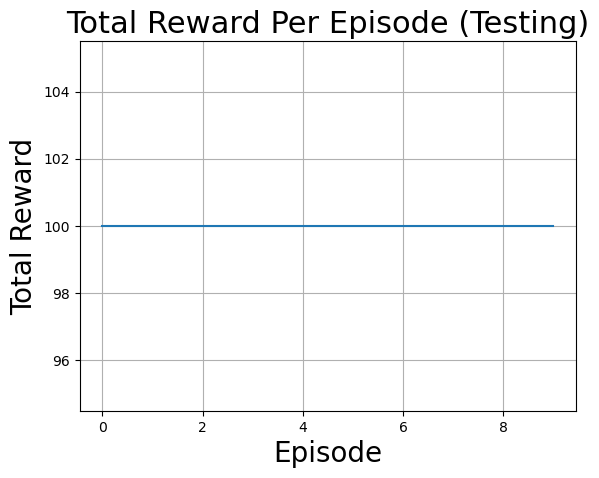

In [219]:
#Total Reward Per Episode Greedy SARSA Deterministic
plt.figure()
plt.plot(D_S_greedy)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Testing)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [226]:
#Greedy Qlearning Stochastic
if __name__ == '__main__':
    env_SGS = GridWorldEnv_S()
    S_S_greedy=greedy_learning_S(learn_S_S.Q_table,env_SGS,0.1,0.9)
    print(S_S_greedy)

[100, 100, 100, 100, 100, 100, 100, 98, 100, 100]


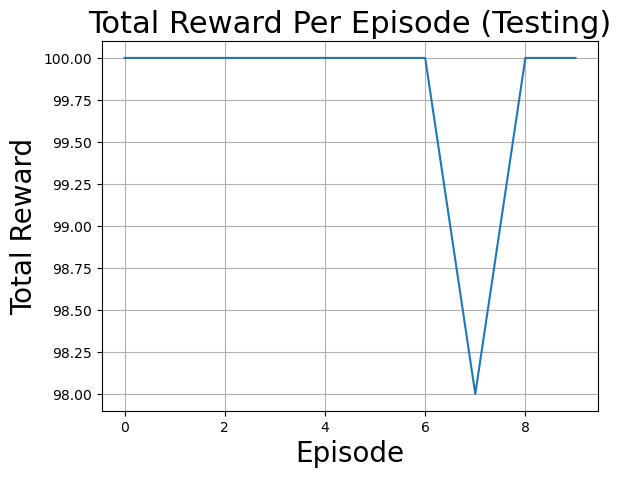

In [227]:
#Total Reward Per Episode Greedy SARSA Stochastic
plt.figure()
plt.plot(S_S_greedy)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Testing)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [223]:
import pickle
with open('D_SARSA', 'wb') as f:
    pickle.dump(learn_D_S.Q_table, f)

In [228]:
with open('S_SARSA', 'wb') as f:
    pickle.dump(learn_S_S.Q_table, f)

In [274]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h1_learn= Q_learning(1000,1,0.9,0.1,0.003,env)
    print(h1_learn.Q_table)
    h1_learn.learning()
    print(h1_learn.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 9.99999999  9.89786128  9.9070635   9.87616731]
 [ 9.99776991  9.34895569  9.47118137  9.65482342]
 [ 9.98100424  8.33155888  8.12011393  8.49664326]
 [ 7.28889373  6.72385984  6.27886076  9.63446357]
 [10.          9.99993436  9.99997942  9.99951572]
 [ 9.99520087  9.98513183  9.99542699 10.        ]
 [ 2.70263957  9.2662531   9.63894241  9.99991539]
 [ 8.968947    8.28210729  9.99717321  8.37266886]
 [10.         10.         10.         10.        ]
 [ 9.99999993  9.99999998  3.9999949  10.        ]
 [ 9.88689791  9.77164225  9.87405621  9.99999904]
 [ 9.53178206  8.0708923   9.99974056  3.41838274]
 [ 8.       

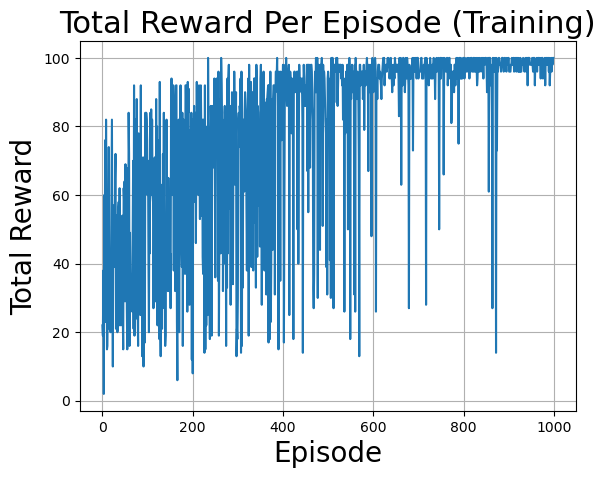

In [275]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h1_learn.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25]


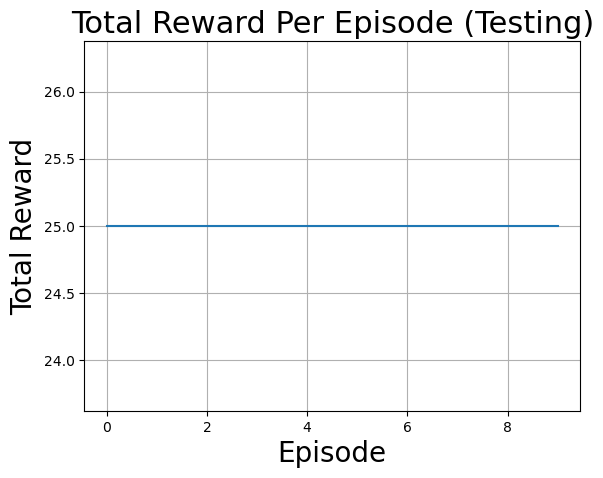

In [328]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h1_l1=greedy_learning(learn_D.Q_table,env_DG,0.1,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h1_l1)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()

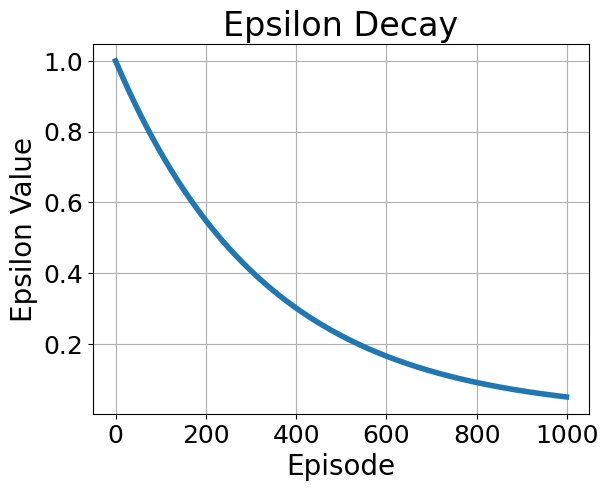

In [334]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.003 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [282]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h2_learn= Q_learning(1000,1,0.9,0.1,0.008,env)
    print(h2_learn.Q_table)
    h2_learn.learning()
    print(h2_learn.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 9.9994661   9.19031557  8.89106726  8.87163973]
 [ 7.08943834  6.23079025  5.48198913  9.83880097]
 [ 7.97884905  3.7530425   3.98150025  4.28581888]
 [ 7.68191073  3.197505    3.31136282  3.52851089]
 [10.          9.97899492  9.9171628   9.95082308]
 [ 9.57963502  9.21874409  8.10902613  9.99993774]
 [-0.07820534  5.8108997   5.49163501  9.62487801]
 [ 6.77394705  4.49360694  9.91949577  5.60422107]
 [10.         10.         10.         10.        ]
 [ 9.99689177  9.99459786  3.95618224 10.        ]
 [ 5.47040142  7.15755076  7.02932032  9.99317163]
 [ 5.31276955  6.31283831  9.91884174  1.15825578]
 [ 8.       

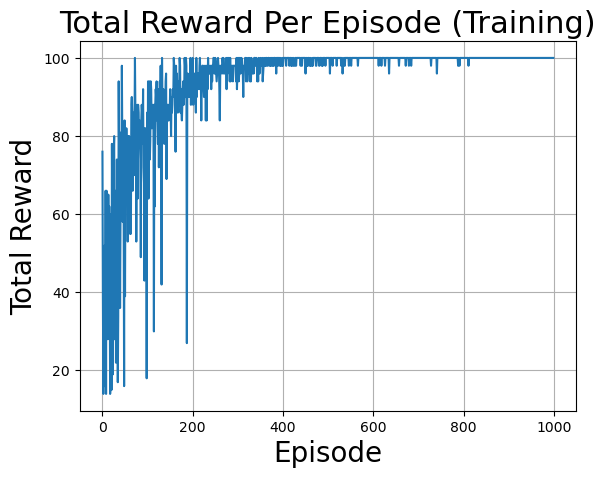

In [283]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h2_learn.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

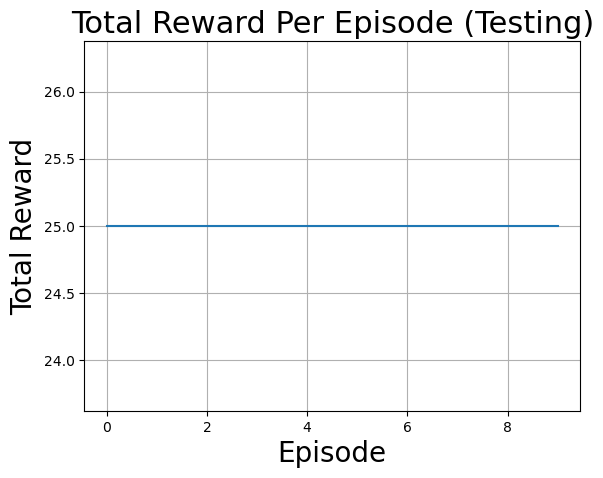

In [329]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h2_l1=greedy_learning(learn_D.Q_table,env_DG,0.1,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h2_l1)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()

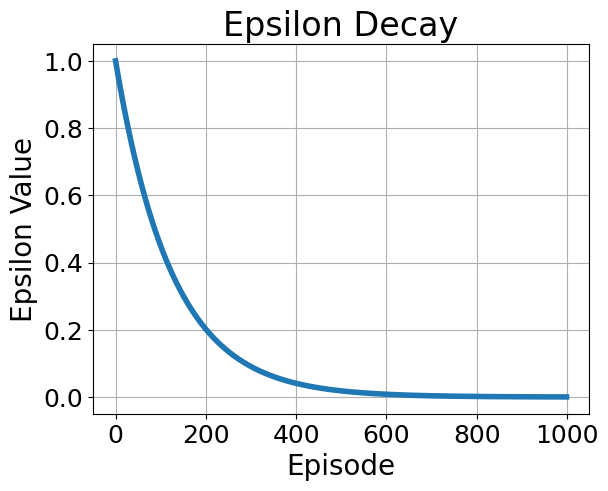

In [335]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.008 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [330]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h3_learn= Q_learning(1000,1,0.9,0.1,0.06,env)
    print(h3_learn.Q_table)
    h3_learn.learning()
    print(h3_learn.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 6.5431946   1.82490891  0.98614028  1.84294825]
 [ 0.65297852  1.06694365  0.61655133  1.7500653 ]
 [ 0.33670707  0.          0.          0.64674033]
 [ 0.14711633  0.20324047 -0.05392401  0.        ]
 [ 9.99999068  3.95670605  4.99953803  3.75276586]
 [ 8.41768752  0.91667119  1.06017157  3.76002604]
 [-0.82191757  0.20791     0.16526947  2.39534862]
 [ 0.14306505  0.1         2.48972892  0.        ]
 [ 9.99998095  9.99990741  9.99988731 10.        ]
 [ 6.53432344  5.5291238  -2.69280234  9.9999884 ]
 [ 0.86577563  0.1187119   0.92527358  5.39961008]
 [ 1.00571876  0.42591345  0.17652317 -1.18602551]
 [ 4.7808006

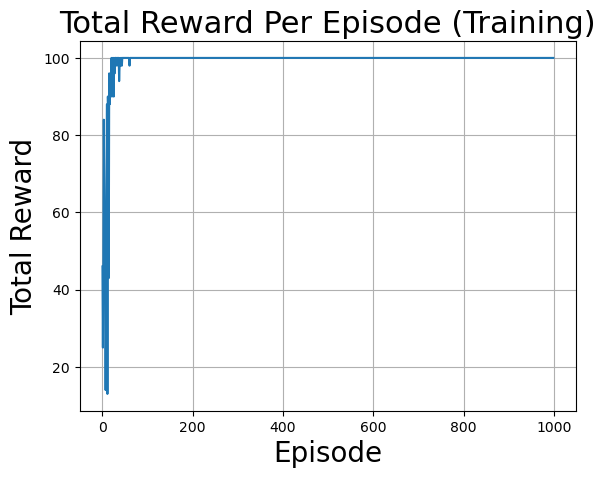

In [331]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h3_learn.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

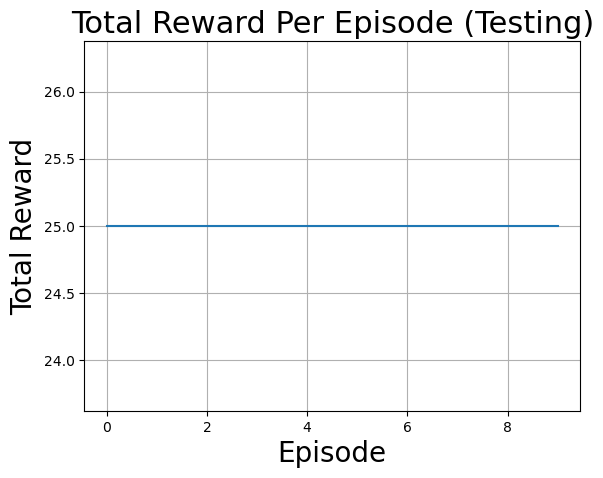

In [332]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h3_l1=greedy_learning(learn_D.Q_table,env_DG,0.1,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h3_l1)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()

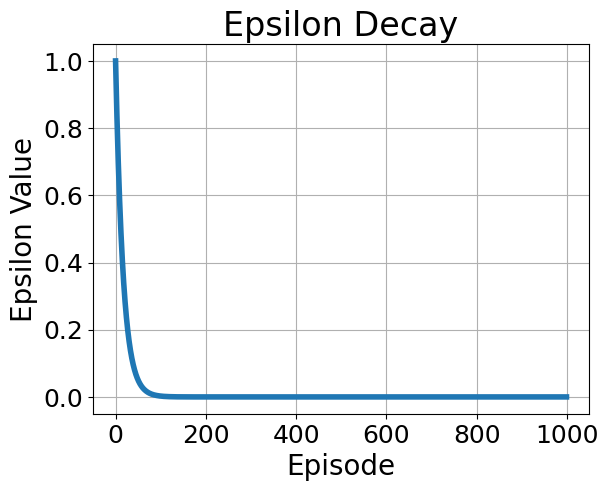

In [296]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.06 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [313]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h1_learn2= Q_learning(1000,1,0.9,1,0.007,env)
    print(h1_learn2.Q_table)
    h1_learn2.learning()
    print(h1_learn2.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10.  8. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [ 4. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10.  4. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10.  4.]
 [ 8. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10.  4. 10. 10.]
 [10. 10. 10. 10.]
 [ 8. 10. 10.  8.]
 [10. 10. 10.  8.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


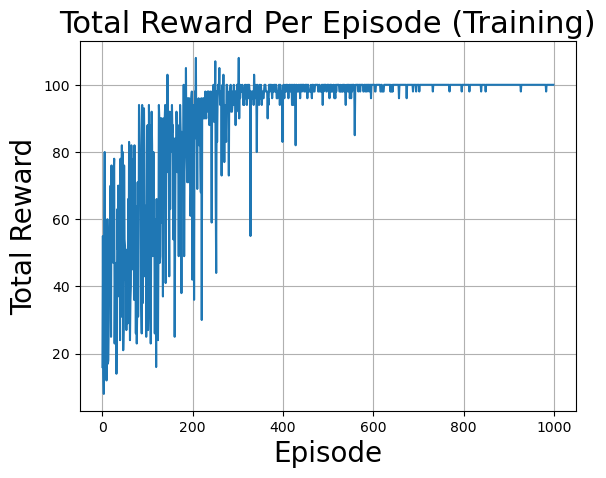

In [314]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h1_learn2.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

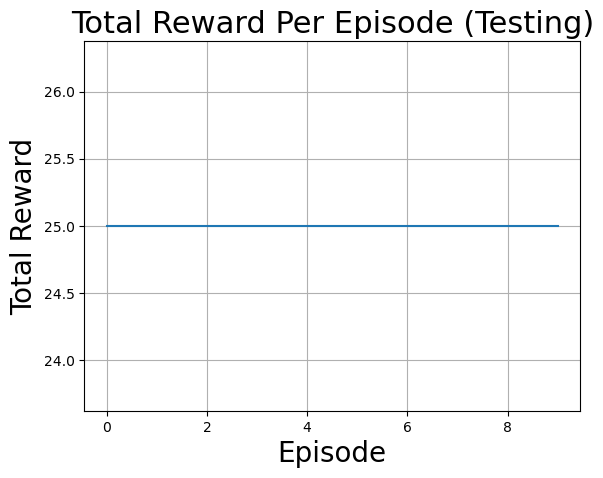

In [339]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h2_l1=greedy_learning(learn_D.Q_table,env_DG,1,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h2_l1)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()

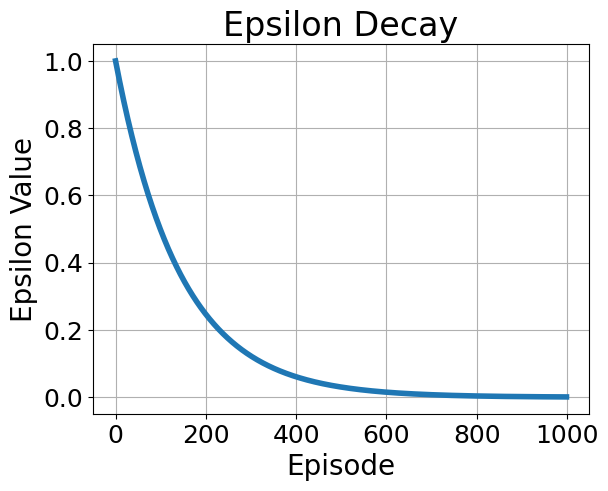

In [338]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.007 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [325]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h2_learn2= Q_learning(1000,1,0.9,0.7,0.007,env)
    print(h2_learn2.Q_table)
    h2_learn2.learning()
    print(h2_learn2.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[10.          9.99999632  9.97282137  9.99999504]
 [ 9.99999998  9.99724256  9.9797417   9.99027777]
 [ 9.99999607  9.99197868  9.99302917  9.99154928]
 [10.          9.99900415  7.98219648  9.99950495]
 [10.          9.985258    9.99999997 10.        ]
 [10.          9.99999972  9.99999997  9.99999993]
 [ 3.99999415  9.99924272 10.          9.99997557]
 [10.         10.         10.          9.99999893]
 [10.         10.         10.         10.        ]
 [10.         10.          4.         10.        ]
 [10.         10.         10.         10.        ]
 [10.         10.         10.          4.        ]
 [ 8.       

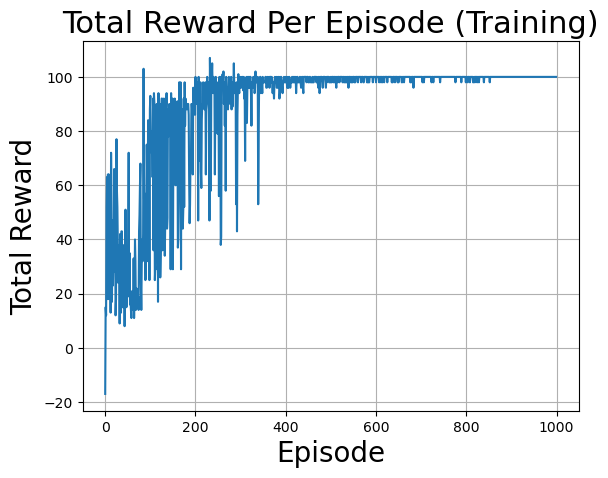

In [326]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h2_learn2.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

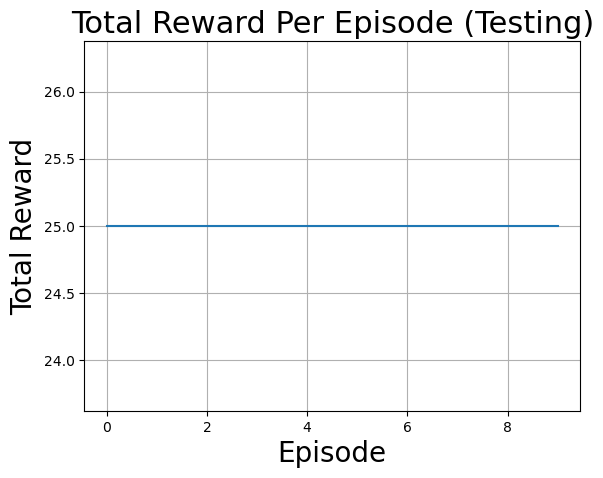

In [340]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h2_l2=greedy_learning(learn_D.Q_table,env_DG,0.7,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h2_l2)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()

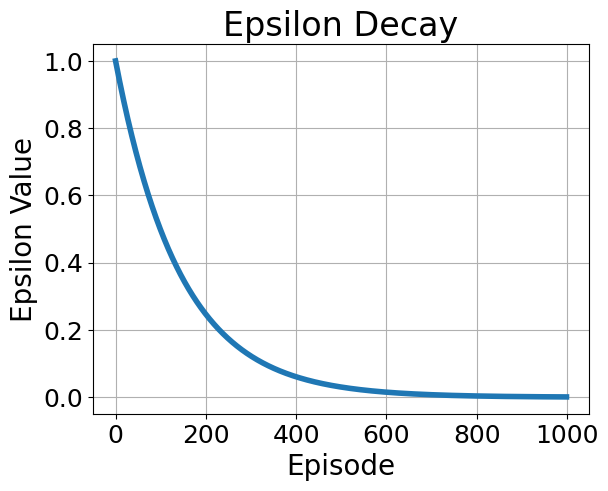

In [336]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.007 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

In [322]:
if __name__ == '__main__':
    env = GridWorldEnv_D()
    # agent = RandomAgent_D(env)
    h3_learn2= Q_learning(1000,1,0.9,0.2,0.007,env)
    print(h3_learn2.Q_table)
    h3_learn2.learning()
    print(h3_learn2.Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 9.99999992  9.88000574  9.6184616   9.96281802]
 [ 9.50222748  8.00852556  7.15845069  9.97918829]
 [ 5.66263526  5.07425829  4.70293248  8.53960701]
 [ 7.15126579  5.18010729  3.94905415  4.19687524]
 [10.          9.99998483  9.99999702  9.99999296]
 [ 9.96886324  9.79419247  9.51193509 10.        ]
 [ 0.96958577  6.01501401  7.36734659  9.88389776]
 [ 6.63169089  4.31093574  9.75279196  6.38052458]
 [10.         10.         10.         10.        ]
 [ 9.99999171  9.99997497  3.99926029 10.        ]
 [ 9.99994311  7.0623401   7.99092916  9.89614344]
 [ 9.90846005  8.29256371  8.6055059   1.4205253 ]
 [ 8.       

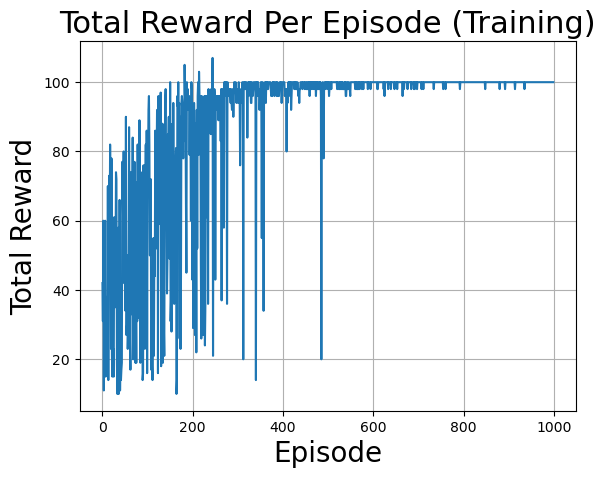

In [324]:
#Total Reward Per Episode Q learning Deterministic
plt.figure()
plt.plot(h3_learn2.episodes_reward)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Total Reward', fontsize=20)
plt.title('Total Reward Per Episode (Training)', fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks([0,50,100,150], fontsize=18)
# plt.ylim(ymin=-102, ymax=102)
# plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

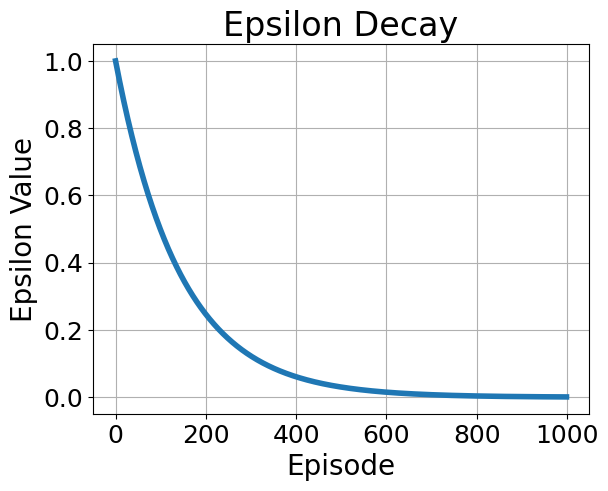

In [337]:
# Generating epsilon values for a sample graph
epsilon_values = [np.exp(-0.007 *i) * 1 for i in range(1000)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim(ymin=0, ymax=1)
# plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

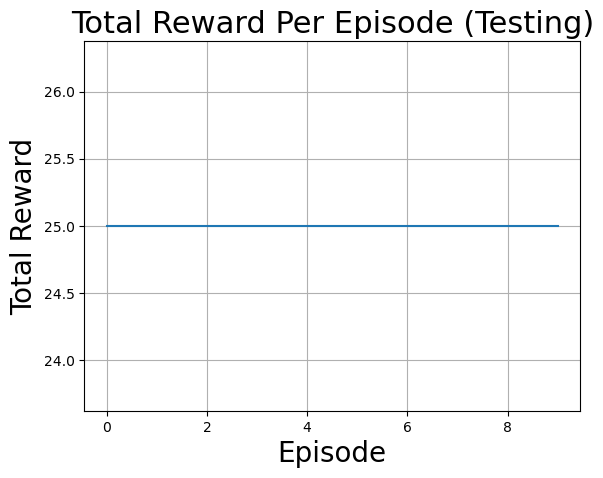

In [341]:
if __name__ == '__main__':
    env_DG = GridWorldEnv_D()
    h2_l3=greedy_learning(learn_D.Q_table,env_DG,0.2,0.9)
    #Total Reward Per Episode Greedy SARSA Stochastic
    plt.figure()
    plt.plot(h2_l3)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Total Reward', fontsize=20)
    plt.title('Total Reward Per Episode (Testing)', fontsize=22)
    # plt.xticks(fontsize=18)
    # plt.yticks([0,50,100,150], fontsize=18)
    # plt.ylim(ymin=-102, ymax=102)
    # plt.xlim(xmin=0, xmax=1000)
    plt.grid()
    plt.show()